## Temporal Evolution of the Sea-Ice Edge of all investigated Simulations

In [18]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import cycler
import glob

In [19]:
def load_experiment(expname): #loads the dataset of a simulation
    fname = expname +"_atm_2d_ml.ym.gm.nc" #filename of global yearly mean
    dpath = "/work/bb1092/pp_JH/" +expname +"/" #simulation path
    DS = xr.open_dataset(dpath +fname, decode_times=False) #loading of dataset
    print(dpath +fname)
    DA = get_var(DS,'sic',False)
    icelat = np.squeeze(np.arcsin(1-DA) * (180./np.pi) )
    time=DA.time
    
    return time, icelat # returns the name of the experiment & the actual dataset & icelat array


def load_experiment2(expname): #loads the dataset of a simulation
    fname = expname +"_atm_2d_ml*.mm.gm.nc" #filename of global yearly mean
    dpath = "/work/bb1092/pp_icon_aes/MLO/AQUA/" +expname +"/" #simulation path
    fpath = glob.glob(dpath +fname)[0]
    DS = xr.open_dataset(fpath, decode_times=True) #loading of dataset
    print(fpath)
    DA = DS["sic"].groupby('time.year').mean('time')
    icelat = np.squeeze(np.arcsin(1-DA) * (180./np.pi) )
    time=DA.year
    return time, icelat # returns the name of the experiment & the actual dataset & icelat array


def get_var(dataset, varname, offsettime): #gets the dataarray with one specific variable
    da=getattr(dataset,varname) #read dataarray
    da.squeeze() #squeeze dataarray (time is the only dimension)
    if offsettime:
        da=da.assign_coords(time=((da.time-da.time[0])/360)) #change time units from days to years & move the origin to 0
    else:
        da=da.assign_coords(time=((da.time)/360)) #change time units from days to years 
    return da


def plot_sim_overview(timearray, icelatarray, expname, linearray):
    
    # get initial ice-edge latitude from filename
    startlat="90°"
    
    splitstr=expname.split('sic')[0][-2:] 
    if splitstr== "77":
        startlat="14°"
    elif splitstr== "74":
        startlat="15°"
    elif splitstr== "71":
        startlat="17°"
    elif splitstr== "50":
        startlat="39°"
    elif splitstr== "37":
        startlat="39°"
    else:
        try: splitstr_Jor=expname.split('_')[3]
        except: splitstr_Jor=""
        if splitstr_Jor=="Jor":
            startlat="30°"
        elif splitstr_Jor=="Jor2":
            startlat="14°"
        elif splitstr_Jor=="Jor4":
            startlat="7°"
        
    # get co2 content and corresponding line color
    co2 = expname.split('_')[2]
    
    """n = 16
    color = plt.cm.tab20b(np.linspace(0, 1,n))
        
    if co2 == "1438ppmv":
        lc = color[0]
    elif co2 == "1500ppmv":
        lc = color[1]
    elif co2 == "1594ppmv":
        lc = color[2]
    elif co2 == "1688ppmv":
        lc = color[3]
    elif co2 == "1875ppmv":
        lc = color[4]
    elif co2 == "2000ppmv":
        lc = color[5]
    elif co2 == "2250ppmv":
        lc = color[6]
    elif co2 == "2500ppmv":
        lc = color[7]
    elif co2 == "2437ppmv":
        lc = color[8]
    elif co2 == "2625ppmv":
        lc = color[9]
    elif co2 == "3000ppmv":
        lc = color[10]
    elif co2 == "3750ppmv":
        lc = color[11]
    elif co2 == "4063ppmv":
        lc = color[12]
    elif co2 == "4219ppmv":
        lc = color[13]
    elif co2 == "4375ppmv":
        lc = color[14]
    elif co2 == "5000ppmv":
        lc = color[15]
    else:
        lc = "white"     
    print(co2)"""
    
    
    colors = ["#1845fb", "#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#578dff", "#656364"]
    
    if co2 == "1438ppmv":
        lc = colors[0]
        ls = 'solid'
    elif co2 == "1500ppmv":
        lc = colors[1]
        ls = 'solid'
    elif co2 == "1594ppmv":
        lc = colors[2]
        ls = 'solid'
    elif co2 == "1688ppmv":
        lc = colors[3]
        ls = 'solid'
    elif co2 == "1875ppmv":
        lc = colors[4]
        ls = 'solid'
    elif co2 == "2000ppmv":
        lc = colors[5]
        ls = 'solid'
    elif co2 == "2250ppmv":
        lc = colors[6]
        ls = 'solid'
    elif co2 == "2437ppmv":
        lc = colors[7]
        ls = 'dashed'
    elif co2 == "2500ppmv":
        lc = colors[0]
        ls = 'solid'
    elif co2 == "2625ppmv":
        lc = colors[1]
        ls = 'dashed'
    elif co2 == "3000ppmv":
        lc = colors[2]
        ls = 'dashed'
    elif co2 == "3750ppmv":
        lc = colors[3]
        ls = 'dashed'
    elif co2 == "4063ppmv":
        lc = colors[4]
        ls = 'dashed'
    elif co2 == "4219ppmv":
        lc = colors[5]
        ls = 'dashed'
    elif co2 == "4375ppmv":
        lc = colors[6]
        ls = 'dashed'
    elif co2 == "5000ppmv":
        lc = colors[7]
        ls = 'dashed'
    else:
        lc = "white"     
    print(co2)
    
    
    
    for checkline in linearray:
        if checkline._label==co2:
            print("label removed")
            co2=None
            break
            
    if co2!=None: line, = plt.plot(timearray, icelatarray, color=lc, label=co2, linestyle=ls)
    else: line, = plt.plot(timearray, icelatarray, color=lc, linestyle=ls)
    
    
    
    return line

In [20]:
expname="mlo_aqua_1500ppmv"


fname = expname +"_atm_2d_ml*.mm.gm.nc" #filename of global yearly mean
dpath = "/work/bb1092/pp_icon_aes/MLO/AQUA/" +expname +"/" #simulation path
fpath = glob.glob(dpath +fname)[0]
DS = xr.open_dataset(fpath, decode_times=True) #loading of dataset
print(fpath)
DA = DS["sic"].groupby('time.year').mean('time')
icelat = np.squeeze(np.arcsin(1-DA) * (180./np.pi) )



/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_1500ppmv/mlo_aqua_1500ppmv_atm_2d_ml_0001to0150.mm.gm.nc


### Semtner experiments

In [25]:
nsim = 12

timearray=np.zeros(nsim,dtype=object)
icelatarray=np.zeros(nsim,dtype=object)
exparray=np.empty(nsim, dtype=object)

exparray[0]="mlo_aqua_1500ppmv_hice_unlim"
exparray[1]="mlo_aqua_1594ppmv_hice_unlim"
exparray[2]="mlo_aqua_1688ppmv_hice_unlim"
exparray[3]="mlo_aqua_1875ppmv_hice_unlim"
exparray[4]="mlo_aqua_2250ppmv_hice_unlim"
exparray[5]="mlo_aqua_3000ppmv"
exparray[6]="mlo_aqua_3000ppmv_77sic_hice_unlim"
exparray[7]="mlo_aqua_3750ppmv_77sic_hice_unlim"
exparray[8]="mlo_aqua_4063ppmv_77sic_hice_unlim"
exparray[9]="mlo_aqua_4375ppmv_77sic_hice_unlim"
exparray[10]="mlo_aqua_5000ppmv"
exparray[11]="mlo_aqua_5000ppmv_77sic_hice_unlim"


for i in range(nsim):
    timearray[i], icelatarray[i] = load_experiment(exparray[i])


/work/bb1092/pp_JH/mlo_aqua_1500ppmv_hice_unlim/mlo_aqua_1500ppmv_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_1594ppmv_hice_unlim/mlo_aqua_1594ppmv_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_1688ppmv_hice_unlim/mlo_aqua_1688ppmv_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_1875ppmv_hice_unlim/mlo_aqua_1875ppmv_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_2250ppmv_hice_unlim/mlo_aqua_2250ppmv_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_3000ppmv/mlo_aqua_3000ppmv_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_3000ppmv_77sic_hice_unlim/mlo_aqua_3000ppmv_77sic_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_3750ppmv_77sic_hice_unlim/mlo_aqua_3750ppmv_77sic_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_4063ppmv_77sic_hice_unlim/mlo_aqua_4063ppmv_77sic_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_4375ppmv_77sic_hice_unlim/mlo_aqua_4375ppmv_77sic_hice_unlim_atm_2d_ml.ym.gm.nc
/work/bb1092/p

1500ppmv
1594ppmv
1688ppmv
1875ppmv
2250ppmv
3000ppmv
3000ppmv
label removed
3750ppmv
4063ppmv
4375ppmv
5000ppmv
5000ppmv
label removed


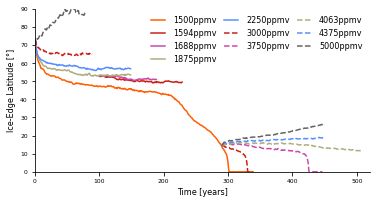

In [32]:
# plot
labelsize=8
ticksize=6
n = 20
color = plt.cm.tab20(np.linspace(0, 1,n))

fig, ax = plt.subplots(figsize=(6,3))
ax.set_prop_cycle(cycler.cycler('color', color))


linearray=[]
for i in range(nsim):
    linearray.append(plot_sim_overview(timearray[i], icelatarray[i], exparray[i], linearray))



plt.ylim(0,90)
plt.xlim(0,520)
plt.xlabel("Time [years]", fontsize=labelsize)
plt.ylabel("Ice-Edge Latitude [°]", fontsize=labelsize)
plt.tick_params(labelsize=ticksize)
#plt.title("hice_unlim global sea ice border")
plt.legend(ncol=3,edgecolor='none', facecolor='none', 
           columnspacing=1, labelspacing=0.5, handlelength=1.7, handletextpad=1, fontsize=labelsize)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig("plots/overview_semtner_unlim_rev1.pdf")

## Winton experiments

In [33]:
nsim = 12
timearray=np.zeros(nsim,dtype=object)
icelatarray=np.zeros(nsim,dtype=object)
exparray=np.empty(nsim, dtype=object)


exparray[0]="mlo_aqua_1875ppmv_winton"
exparray[1]="mlo_aqua_2250ppmv_winton"
exparray[2]="mlo_aqua_2437ppmv_winton"
exparray[3]="mlo_aqua_2625ppmv_winton"
exparray[4]="mlo_aqua_3000ppmv_winton"
exparray[5]="mlo_aqua_3000ppmv_winton_50sic"
exparray[6]="mlo_aqua_3000ppmv_74sic_winton"
exparray[7]="mlo_aqua_4219ppmv_winton_50sic"
exparray[8]="mlo_aqua_4219ppmv_71sic_winton_semtnerrestart"
exparray[9]="mlo_aqua_5000ppmv_winton"
exparray[10]="mlo_aqua_5000ppmv_37sic_winton"
exparray[11]="mlo_aqua_5000ppmv_74sic_winton"

for i in range(nsim):
    timearray[i], icelatarray[i] = load_experiment(exparray[i])

/work/bb1092/pp_JH/mlo_aqua_1875ppmv_winton/mlo_aqua_1875ppmv_winton_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_2250ppmv_winton/mlo_aqua_2250ppmv_winton_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_2437ppmv_winton/mlo_aqua_2437ppmv_winton_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_2625ppmv_winton/mlo_aqua_2625ppmv_winton_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_3000ppmv_winton/mlo_aqua_3000ppmv_winton_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_3000ppmv_winton_50sic/mlo_aqua_3000ppmv_winton_50sic_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_3000ppmv_74sic_winton/mlo_aqua_3000ppmv_74sic_winton_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_4219ppmv_winton_50sic/mlo_aqua_4219ppmv_winton_50sic_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_4219ppmv_71sic_winton_semtnerrestart/mlo_aqua_4219ppmv_71sic_winton_semtnerrestart_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_5000ppmv_winton/mlo_aqua_5000ppmv_winton_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_5000ppmv_37sic

1875ppmv
2250ppmv
2437ppmv
2625ppmv
3000ppmv
3000ppmv
label removed
3000ppmv
label removed
4219ppmv
4219ppmv
label removed
5000ppmv
5000ppmv
label removed
5000ppmv
label removed


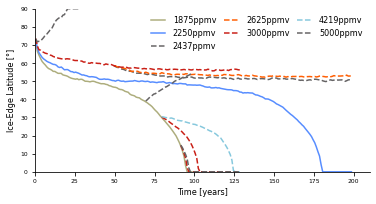

In [34]:
# plot
color = plt.cm.tab20(np.linspace(0, 1,n))

fig, ax = plt.subplots(figsize=(6,3))
ax.set_prop_cycle(cycler.cycler('color', color))

linearray=[]
for i in range(nsim):
    linearray.append(plot_sim_overview(timearray[i], icelatarray[i], exparray[i], linearray))



plt.ylim(0,90)
plt.xlim(0,210)
plt.xlabel("Time [years]", fontsize=labelsize)
plt.ylabel("Ice-Edge Latitude [°]", fontsize=labelsize)
#plt.title("hice_unlim global sea ice border")
plt.tick_params(labelsize=ticksize)
plt.legend(ncol=3,edgecolor='none', facecolor='none',loc=1,
           columnspacing=1, labelspacing=0.5, handlelength=1.7, handletextpad=1, fontsize=labelsize)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig("plots/overview_winton_rev1.pdf")


## Semtner limited experiments

In [35]:
nsim = 11
timearray=np.zeros(nsim,dtype=object)
icelatarray=np.zeros(nsim,dtype=object)
exparray=np.empty(nsim, dtype=object)


exparray[0]="mlo_aqua_1438ppmv"
exparray[1]="mlo_aqua_1500ppmv"
exparray[2]="mlo_aqua_1594ppmv"
exparray[3]="mlo_aqua_2000ppmv_Jor2"
exparray[4]="mlo_aqua_2500ppmv_Jor2"
exparray[5]="mlo_aqua_3000ppmv"
exparray[6]="mlo_aqua_3000ppmv_Jor"
exparray[7]="mlo_aqua_3000ppmv_Jor2"
exparray[8]="mlo_aqua_5000ppmv"
exparray[9]="mlo_aqua_5000ppmv_Jor2"
exparray[10]="mlo_aqua_5000ppmv_Jor4"

timearray[0], icelatarray[0] = load_experiment2(exparray[0])
timearray[1], icelatarray[1] = load_experiment(exparray[1])
timearray[2], icelatarray[2] = load_experiment(exparray[2])
timearray[3], icelatarray[3] = load_experiment2(exparray[3])
timearray[4], icelatarray[4] = load_experiment2(exparray[4])
timearray[5], icelatarray[5] = load_experiment2(exparray[5])
timearray[6], icelatarray[6] = load_experiment2(exparray[6])
timearray[7], icelatarray[7] = load_experiment2(exparray[7])
timearray[8], icelatarray[8] = load_experiment2(exparray[8])
timearray[9], icelatarray[9] = load_experiment2(exparray[9])
timearray[10], icelatarray[10] = load_experiment2(exparray[10])

/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_1438ppmv/mlo_aqua_1438ppmv_atm_2d_ml_0137to0338.mm.gm.nc
/work/bb1092/pp_JH/mlo_aqua_1500ppmv/mlo_aqua_1500ppmv_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_JH/mlo_aqua_1594ppmv/mlo_aqua_1594ppmv_atm_2d_ml.ym.gm.nc
/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_2000ppmv_Jor2/mlo_aqua_2000ppmv_Jor2_atm_2d_ml_0258to0277.mm.gm.nc
/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_2500ppmv_Jor2/mlo_aqua_2500ppmv_Jor2_atm_2d_ml_0258to0341.mm.gm.nc
/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_3000ppmv/mlo_aqua_3000ppmv_atm_2d_ml_0001to0089.mm.gm.nc
/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_3000ppmv_Jor/mlo_aqua_3000ppmv_Jor_atm_2d_ml_0298to0337.mm.gm.nc
/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_3000ppmv_Jor2/mlo_aqua_3000ppmv_Jor2_atm_2d_ml_0258to0425.mm.gm.nc
/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_5000ppmv/mlo_aqua_5000ppmv_atm_2d_ml_0001to0079.mm.gm.nc
/work/bb1092/pp_icon_aes/MLO/AQUA/mlo_aqua_5000ppmv_Jor2/mlo_aqua_5000ppmv_Jor2_atm_2d_ml_0258to0306.mm.gm.nc
/wor

1438ppmv
1500ppmv
1594ppmv
2000ppmv
2500ppmv
3000ppmv
3000ppmv
label removed
3000ppmv
label removed
5000ppmv
5000ppmv
label removed
5000ppmv
label removed


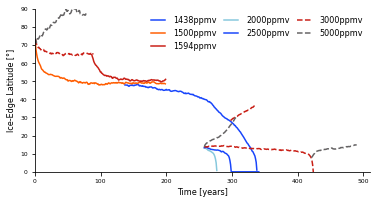

In [36]:
#plot

color = plt.cm.tab20(np.linspace(0, 1,n))

fig, ax = plt.subplots(figsize=(6,3))
ax.set_prop_cycle(cycler.cycler('color', color))


linearray=[]
for i in range(nsim):
    linearray.append(plot_sim_overview(timearray[i], icelatarray[i], exparray[i], linearray))



plt.ylim(0,90)
plt.xlim(0,510)
plt.xlabel("Time [years]", fontsize=labelsize)
plt.ylabel("Ice-Edge Latitude [°]", fontsize=labelsize)
plt.tick_params(labelsize=ticksize)
#plt.title("hice_unlim global sea ice border")
plt.legend(ncol=3,edgecolor='none', facecolor='none',loc=1, 
           columnspacing=1, labelspacing=0.5, handlelength=1.7, handletextpad=1, fontsize=labelsize)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.savefig("plots/overview_semtner_5m_rev1.pdf")
